In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# About this file
The file contains ball by ball details for all matches for all seasons.

## Columns
1. id
2. season
3. city
4. date
5. team1
6. team2
7. toss_winner
8. toss_decision
9. result
10. dl_applied : Duckworth Lewis method
11. winner
12. win_by_runs
13. win_by_wickets
14. player_of_match
15. venue
16. umpire1
17. umpire2
18. umpire3

In [2]:
# Loading the csv file
df=pd.read_csv("matches.csv")
# Printing first 5 rows
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Printing dimension of dataset (Rows, Columns)
df.shape

(636, 18)

In [4]:
# Information about Null Values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


# Data Cleaning

In [5]:
# Getting the information about number of Null value in each column
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [6]:
# Filling Null values for categorical coumns
df["city"].fillna(df["city"].mode()[0], inplace=True)
df["winner"].fillna(df["winner"].mode()[0], inplace=True)
df["player_of_match"].fillna(df["player_of_match"].mode()[0], inplace=True)
df["umpire1"].fillna(df["umpire1"].mode()[0], inplace=True)
df["umpire2"].fillna(df["umpire2"].mode()[0], inplace=True)

# Getting the information about number of Null value in each column
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            636
dtype: int64

In [7]:
# Since column umpire3 contains only null values so drop it because this column is not important
df.drop("umpire3", axis=1, inplace=True)
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel


# Data Visualisation

In [8]:
print("Number of matches :",df["id"].max())

Number of matches : 636


We can say that we have informations about 636 matches because id is a variable for which a unique is given to each match.

In [9]:
print("Seasons :",df["season"].unique())
print("Number of Seasons :",len(df["season"].unique()))

Seasons : [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Number of Seasons : 10


There are 10 seasons from 2008 to 2017

In [10]:
# For getting the information about which team had won the match by maximum runs
df[df["win_by_runs"]==df["win_by_runs"].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


We can see that Mumbai Indians won the match by maximum run (146)

In [11]:
# For getting the information about which team had won the match by maximum wickets
df[df["win_by_wickets"]==df["win_by_wickets"].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


We can see that there are 10 teams who won the match by maximum wickets (10)

In [12]:
# For getting the information about which team had won the match by minimum runs (Closest Margin)
df[df["win_by_runs"]==1]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin
344,345,2012,Delhi,2012-04-29,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker
350,351,2012,Pune,2012-05-03,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,SL Malinga,Subrata Roy Sahara Stadium,Asad Rauf,S Asnani
518,519,2015,Chennai,2015-04-09,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena


We can see that there are 10 teams who won the match by closest margin of 1 

In [13]:
# For getting the information about which team had won the match by minimum wickets
df[df["win_by_wickets"]==1]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
559,560,2015,Kolkata,2015-05-09,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,1,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena


We can see that there is only one team who won the match by minimum wicket(1)

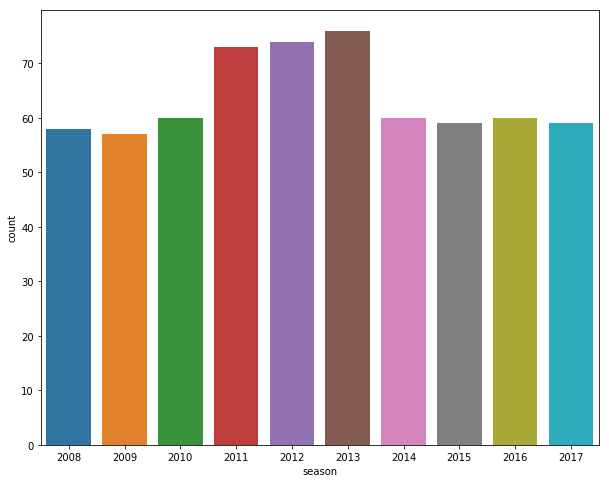

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(df["season"])

In [15]:
df["season"].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

From the plot and value counts we can see that season 2013 had most number of matches

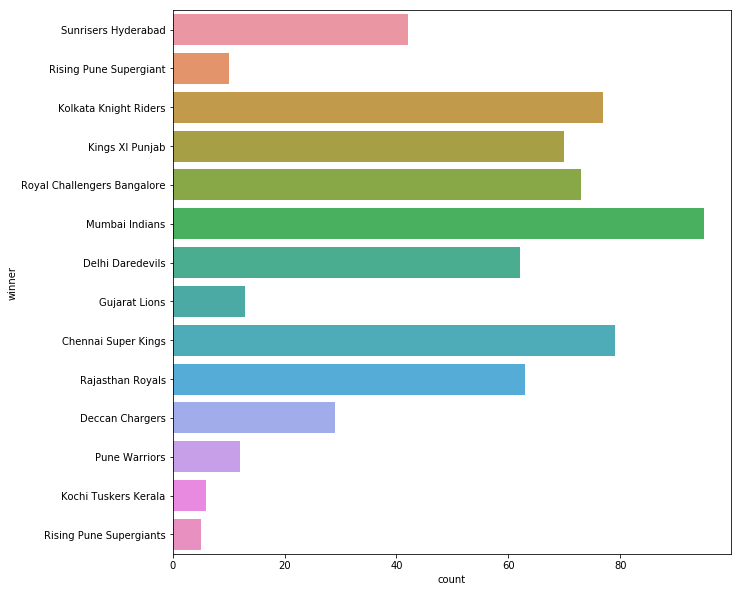

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y=df["winner"],data=df)

In [17]:
df["winner"].value_counts()

Mumbai Indians                 95
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

From the plot and value counts we can see that Mumbai Indians is the most successful IPL Team as it won more number of matches as compared to other teams

In [18]:
df1=df.groupby(["player_of_match"])["id"].count()
df2=df1[df1>5].sort_values(ascending=False)
df2

player_of_match
CH Gayle           21
YK Pathan          16
AB de Villiers     15
DA Warner          15
SK Raina           14
RG Sharma          14
G Gambhir          13
MS Dhoni           13
AM Rahane          12
MEK Hussey         12
V Sehwag           11
V Kohli            11
DR Smith           11
SR Watson          10
JH Kallis          10
KA Pollard          9
SE Marsh            9
A Mishra            9
SR Tendulkar        8
RA Jadeja           7
RV Uthappa          7
AT Rayudu           7
AC Gilchrist        7
M Vijay             6
Harbhajan Singh     6
SP Narine           6
BJ Hodge            6
AD Russell          6
UT Yadav            6
A Nehra             6
Name: id, dtype: int64

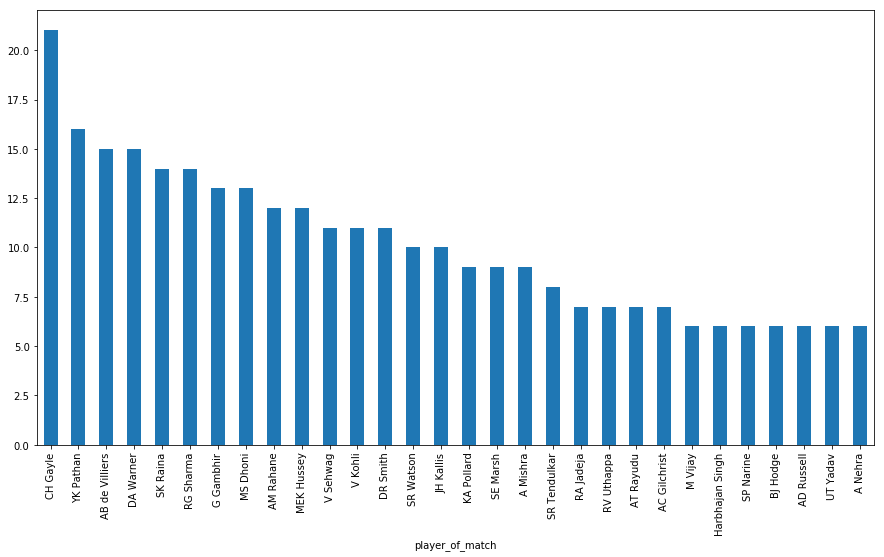

In [19]:
plt.figure(figsize=(15,8))
df2.plot(kind="bar")

From the above plot we can see that most of the times CH Gayle is selected as player of the match

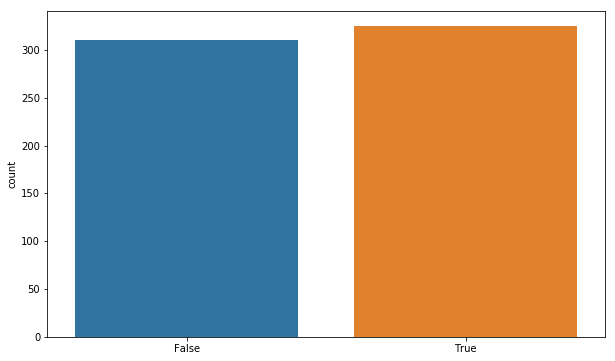

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df["toss_winner"]==df["winner"])

From the plot, we can say that Toss-winning has helped in Match-winning because the count is very high.

# Feature Engineering

In [21]:
df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [22]:
# Since id and date columns are not important so drop them
df.drop(["id","date"], axis=1, inplace=True)

In [23]:
# Listing categorical columns
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [24]:
for label in cat_cols:
    # create the Label encoder object
    le=LabelEncoder()
    # convert the categorical columns into numeric by assigning a numerical lebel to categorical label
    df[label]=le.fit_transform(df[label])
    
    col_mappings = {index: label for index, label in enumerate(le.classes_)}
    print("Mapping in column",label)
    print("****"*30)
    print(col_mappings)
    print()

Mapping in column city
************************************************************************************************************************
{0: 'Abu Dhabi', 1: 'Ahmedabad', 2: 'Bangalore', 3: 'Bloemfontein', 4: 'Cape Town', 5: 'Centurion', 6: 'Chandigarh', 7: 'Chennai', 8: 'Cuttack', 9: 'Delhi', 10: 'Dharamsala', 11: 'Durban', 12: 'East London', 13: 'Hyderabad', 14: 'Indore', 15: 'Jaipur', 16: 'Johannesburg', 17: 'Kanpur', 18: 'Kimberley', 19: 'Kochi', 20: 'Kolkata', 21: 'Mumbai', 22: 'Nagpur', 23: 'Port Elizabeth', 24: 'Pune', 25: 'Raipur', 26: 'Rajkot', 27: 'Ranchi', 28: 'Sharjah', 29: 'Visakhapatnam'}

Mapping in column team1
************************************************************************************************************************
{0: 'Chennai Super Kings', 1: 'Deccan Chargers', 2: 'Delhi Daredevils', 3: 'Gujarat Lions', 4: 'Kings XI Punjab', 5: 'Kochi Tuskers Kerala', 6: 'Kolkata Knight Riders', 7: 'Mumbai Indians', 8: 'Pune Warriors', 9: 'Rajasthan Royals', 10: '

In [25]:
df.dtypes

season             int64
city               int32
team1              int32
team2              int32
toss_winner        int32
toss_decision      int32
result             int32
dl_applied         int64
winner             int32
win_by_runs        int64
win_by_wickets     int64
player_of_match    int32
venue              int32
umpire1            int32
umpire2            int32
dtype: object

# Creating Model

In [26]:
# Splitting the Dataset into training and testing part
# "winner","season","city","umpire1","umpire2" these variable are not going to decide who will win the match so dont included in x
x=df.drop(["winner","season","city","umpire1","umpire2"], axis=1)
y=df['winner']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(508, 10)
(508,)
(128, 10)
(128,)


In [27]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [28]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# Creating object
model = RandomForestClassifier(n_estimators=100)

# Training the model
model.fit(x_train,y_train)

# Prediction
y_pred=model.predict(x_test)
y_pred

array([ 0, 12,  0,  0, 13,  7,  1, 13,  4,  4,  3,  6,  2,  7, 12,  2,  0,
        2,  4,  0,  8,  0,  0,  2,  6,  7, 12,  9, 13,  0,  2,  0,  9,  7,
        9,  2,  1,  2,  4,  2,  0,  0,  6,  3,  7,  0, 12,  6,  0, 12,  6,
        2,  9,  6,  0,  7,  1,  6,  2,  1,  4,  7, 12,  0,  6, 13,  4,  7,
        2,  0,  6,  0,  7,  7,  9,  0, 10,  6, 12, 12,  7,  4, 12, 13,  6,
       12,  4, 12,  7,  2, 12,  2,  0,  7,  6,  7, 13, 12,  7,  6,  2,  1,
        0,  7,  7,  7,  2,  2,  4, 13, 12,  0,  7, 12,  6,  4,  4,  0,  6,
        6,  7,  8,  0, 13,  7,  9,  6,  2])

In [29]:
print("Accuracy of Logistic Regression is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of Logistic Regression is 80.47 %
